# First (single) level analysis - Part 2

In [8]:
%%capture

import io
import nbformat

def execute_notebook(nbfile):
    with io.open(nbfile, encoding="utf8") as f:
        nb = nbformat.read(f, as_version=4)

    ip = get_ipython()

    for cell in nb.cells:
        if cell.cell_type != 'code':
            continue
        ip.run_cell(cell.source)

execute_notebook('2_Dataset.ipynb')
execute_notebook('3_First_level_analysis1.ipynb')

Exception ignored in: <function ResourceTracker.__del__ at 0x104b51ee0>
Traceback (most recent call last):
  File "/opt/miniconda3/envs/NiLearn/lib/python3.13/multiprocessing/resource_tracker.py", line 82, in __del__
  File "/opt/miniconda3/envs/NiLearn/lib/python3.13/multiprocessing/resource_tracker.py", line 91, in _stop
  File "/opt/miniconda3/envs/NiLearn/lib/python3.13/multiprocessing/resource_tracker.py", line 116, in _stop_locked
ChildProcessError: [Errno 10] No child processes
Exception ignored in: <function ResourceTracker.__del__ at 0x102819ee0>
Traceback (most recent call last):
  File "/opt/miniconda3/envs/NiLearn/lib/python3.13/multiprocessing/resource_tracker.py", line 82, in __del__
  File "/opt/miniconda3/envs/NiLearn/lib/python3.13/multiprocessing/resource_tracker.py", line 91, in _stop
  File "/opt/miniconda3/envs/NiLearn/lib/python3.13/multiprocessing/resource_tracker.py", line 116, in _stop_locked
ChildProcessError: [Errno 10] No child processes


In [3]:
from pathlib import Path

print([Path(run).name for run in models_run_imgs[0]])

['sub-01_task-languagelocalizer_desc-preproc_bold.nii.gz']


In [4]:
print(models_confounds[0][0].columns)

Index(['RotX', 'RotY', 'RotZ', 'X', 'Y', 'Z'], dtype='object')


In [5]:
print(models_events[0][0]["trial_type"].value_counts())

trial_type
language    12
string      12
Name: count, dtype: int64


Here, we specify the significance level for our single level analysis:

In [6]:
from scipy.stats import norm

p001_unc = norm.isf(0.001)

## Plotting the z-map:
Finally, we plot the significant z-values for all of our subjects analysed in the first level analysis. We specify our contrast of interest in this step via the .compute_contrast function.

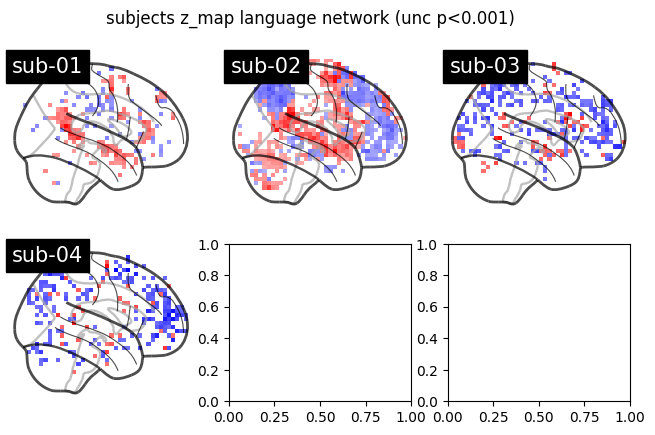

Exception ignored in: <function ResourceTracker.__del__ at 0x1028b5ee0>
Traceback (most recent call last):
  File "/opt/miniconda3/envs/NiLearn/lib/python3.13/multiprocessing/resource_tracker.py", line 82, in __del__
  File "/opt/miniconda3/envs/NiLearn/lib/python3.13/multiprocessing/resource_tracker.py", line 91, in _stop
  File "/opt/miniconda3/envs/NiLearn/lib/python3.13/multiprocessing/resource_tracker.py", line 116, in _stop_locked
ChildProcessError: [Errno 10] No child processes
Exception ignored in: <function ResourceTracker.__del__ at 0x104559ee0>
Traceback (most recent call last):
  File "/opt/miniconda3/envs/NiLearn/lib/python3.13/multiprocessing/resource_tracker.py", line 82, in __del__
  File "/opt/miniconda3/envs/NiLearn/lib/python3.13/multiprocessing/resource_tracker.py", line 91, in _stop
  File "/opt/miniconda3/envs/NiLearn/lib/python3.13/multiprocessing/resource_tracker.py", line 116, in _stop_locked
ChildProcessError: [Errno 10] No child processes


In [7]:
from math import ceil

import matplotlib.pyplot as plt
import numpy as np
from nilearn import plotting # import plotting here

ncols = 3
nrows = ceil(len(models) / ncols)

fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(8, 4.5))
axes = np.atleast_2d(axes)
model_and_args = zip(models, models_run_imgs, models_events, models_confounds)
for midx, (model, imgs, events, confounds) in enumerate(model_and_args):
    # fit the GLM
    model.fit(imgs, events, confounds)
    # compute the contrast of interest
    zmap = model.compute_contrast("language-string")
    plotting.plot_glass_brain(
        zmap,
        colorbar=False,
        threshold=p001_unc,
        title=f"sub-{model.subject_label}",
        axes=axes[int(midx / ncols), int(midx % ncols)],
        plot_abs=False,
        display_mode="x",
        cmap="bwr",
    )
fig.suptitle("subjects z_map language network (unc p<0.001)")
plotting.show()